<a href="https://colab.research.google.com/github/ashraf-ahmed/ml/blob/master/Polynomial_Curve_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polynomial Curve Fitting

All of the examples included here are generated by following the text from Bishop's Pattern Recognition and Machine Learning section 1.1

##Data: 

Generated using the following equation $y = sin(2\pi x)+e$ , where $ e \sim N(0, 0.3)$

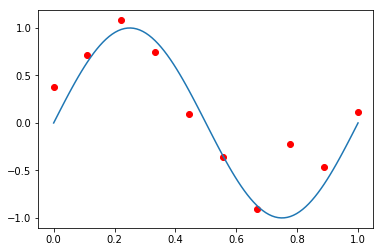

In [61]:
import numpy as np
from matplotlib import pyplot as plt



N_train = 10
N_test = 100

x_train = np.linspace(0,1,num=N_train)
x_test = np.linspace(0,1,num=N_test)

t_train = np.sin(2*np.pi*x_train) + np.random.normal(0, 0.3, len(x_train))
t_test = np.sin(2*np.pi*x_test) + np.random.normal(0, 0.5, len(x_test)) 

def plot_data():
  plt.plot(x_train, t_train, 'ro')
  plt.plot(x_test, np.sin(2*np.pi*x_test))

plot_data()


##Curve Fitting using a polynomial

Model: $y(x,\textbf{w}) = \sum_{j=1}^{M} w_j x^j$ , where $M$ is order of polynomial


In [0]:
def adjust_data(x, M=0):
  """
  returns a matrix where first column is x^0, second column x^1, ... until x^M. 
  This is needed to fit a polynomial function to the data
  """

  data = np.ones(len(x))
  for i in range(1, M+1):
    data = np.column_stack((data, np.power(x,i)))
    
    
  if M == 0:
    #This case is needed since lstsq requires at least a 2D design matrix
    data = np.column_stack((data, np.zeros(len(x))))
    
  return data

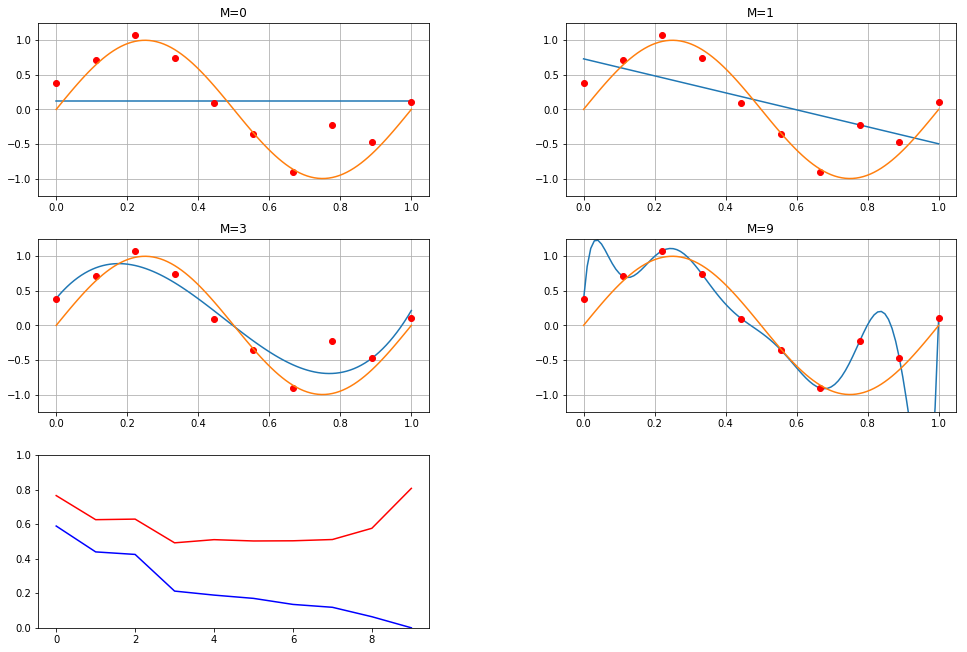

In [84]:
import scipy.linalg as la
import math

def error(y, y_hat, N):
  E_w = 1/2 * np.sum(np.power(y-y_hat, 2))
  return math.sqrt(2*E_w/N)
  
models = {}
order = []

errors_train = []
errors_test = []

for i in range(0, 10):
  order.append(i)
  data_train = adjust_data(x_train, M=i)
  w, res, rank, s = la.lstsq(data_train, t_train)
  y_hat = np.dot(data_train, w)
  
  data_test = adjust_data(x_test, M=i)
  y_pred = np.dot(data_test, w)

  models[i] = {
      "w": w, 
      "y_hat": y_hat,
      "y_pred": y_pred
  }
  
  errors_train.append(error(t_train, y_hat, N_train))
  errors_test.append(error(t_test, y_pred, N_test))

#Print the approximated polynomial for different orders
plt.figure(figsize=(15,10))
plt.subplot(321)
plt.plot(x_test, models[0]["y_pred"])
plot_data()
# plt.yscale('t')
plt.title('M=0')
plt.ylim([-1.25,1.25])
plt.xlim([-.05,1.05])
plt.grid(True)

plt.subplot(322)
plt.plot(x_test, models[1]["y_pred"])
plot_data()
# plt.yscale('t')
plt.title('M=1')
plt.ylim([-1.25,1.25])
plt.xlim([-.05,1.05])
plt.grid(True)

plt.subplot(323)
plt.plot(x_test, models[3]["y_pred"])
plot_data()
# plt.yscale('t')
plt.title('M=3')
plt.ylim([-1.25,1.25])
plt.xlim([-.05,1.05])
plt.grid(True)

plt.subplot(324)
plt.plot(x_test, models[9]["y_pred"])
plot_data()
# plt.yscale('t')
plt.title('M=9')
plt.ylim([-1.25,1.25])
plt.xlim([-.05,1.05])
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.subplot(325)
plt.ylim([0,1])
plt.plot(order, errors_train, color="blue")
plt.plot(order, errors_test, color="red")
plg.title("E")

